In [24]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt

In [3]:
df=pd.read_csv('SalaryData_Train(1).csv')
df

,age,workclass,education,educationno,maritalstatus,occupation,relationship,race,sex,capitalgain,capitalloss,hoursperweek,native,Salary
0,39,State-gov,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30156,27,Private,Assoc-acdm,12,Married-civ-spouse,Tech-support,Wife,White,Female,0,0,38,United-States,<=50K
30157,40,Private,HS-grad,9,Married-civ-spouse,Machine-op-inspct,Husband,White,Male,0,0,40,United-States,>50K
30158,58,Private,HS-grad,9,Widowed,Adm-clerical,Unmarried,White,Female,0,0,40,United-States,<=50K
30159,22,Private,HS-grad,9,Never-married,Adm-clerical,Own-child,White,Male,0,0,20,United-States,<=50K


In [4]:
df.isna().sum()

age              0
workclass        0
education        0
educationno      0
maritalstatus    0
occupation       0
relationship     0
race             0
sex              0
capitalgain      0
capitalloss      0
hoursperweek     0
native           0
Salary           0
dtype: int64

In [5]:
df.pop('capitalgain')
df.pop('capitalloss')
df.pop('education')

0          Bachelors
1          Bachelors
2            HS-grad
3               11th
4          Bachelors
            ...     
30156     Assoc-acdm
30157        HS-grad
30158        HS-grad
30159        HS-grad
30160        HS-grad
Name: education, Length: 30161, dtype: object

In [6]:
from sklearn import preprocessing
label_encoder = preprocessing.LabelEncoder()
df['workclass']= label_encoder.fit_transform(df['workclass'])
df['maritalstatus']= label_encoder.fit_transform(df['maritalstatus'])
df['occupation']= label_encoder.fit_transform(df['occupation'])
df['relationship']= label_encoder.fit_transform(df['relationship'])
df['race']= label_encoder.fit_transform(df['race'])
df['sex']= label_encoder.fit_transform(df['sex'])
df['native']= label_encoder.fit_transform(df['native'])
df['Salary']= label_encoder.fit_transform(df['Salary'])
df

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
0,39,5,13,4,0,1,4,1,40,37,0
1,50,4,13,2,3,0,4,1,13,37,0
2,38,2,9,0,5,1,4,1,40,37,0
3,53,2,7,2,5,0,2,1,40,37,0
4,28,2,13,2,9,5,2,0,40,4,0
...,...,...,...,...,...,...,...,...,...,...,...
30156,27,2,12,2,12,5,4,0,38,37,0
30157,40,2,9,2,6,0,4,1,40,37,1
30158,58,2,9,6,0,4,4,0,40,37,0
30159,22,2,9,4,0,3,4,1,20,37,0


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30161 entries, 0 to 30160
Data columns (total 11 columns):
 #   Column         Non-Null Count  Dtype
---  ------         --------------  -----
 0   age            30161 non-null  int64
 1   workclass      30161 non-null  int32
 2   educationno    30161 non-null  int64
 3   maritalstatus  30161 non-null  int32
 4   occupation     30161 non-null  int32
 5   relationship   30161 non-null  int32
 6   race           30161 non-null  int32
 7   sex            30161 non-null  int32
 8   hoursperweek   30161 non-null  int64
 9   native         30161 non-null  int32
 10  Salary         30161 non-null  int32
dtypes: int32(8), int64(3)
memory usage: 1.6 MB


In [8]:
df.describe()

,age,workclass,educationno,maritalstatus,occupation,relationship,race,sex,hoursperweek,native,Salary
count,30161.000000,30161.00000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000,30161.000000
mean,38.438115,2.19933,10.121316,2.580087,5.959849,1.418322,3.678592,0.675707,40.931269,35.413481,0.248931
std,13.134830,0.95394,2.550037,1.498018,4.029633,1.601361,0.834721,0.468118,11.980182,5.956430,0.432401
min,17.000000,0.00000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000
25%,28.000000,2.00000,9.000000,2.000000,2.000000,0.000000,4.000000,0.000000,40.000000,37.000000,0.000000
50%,37.000000,2.00000,10.000000,2.000000,6.000000,1.000000,4.000000,1.000000,40.000000,37.000000,0.000000
75%,47.000000,2.00000,13.000000,4.000000,9.000000,3.000000,4.000000,1.000000,45.000000,37.000000,0.000000
max,90.000000,6.00000,16.000000,6.000000,13.000000,5.000000,4.000000,1.000000,99.000000,39.000000,1.000000


In [9]:
# converting x and y as array
x=df.iloc[:,0:-1].values
y=df['Salary'].values

In [10]:
df.Salary.value_counts()

0    22653
1     7508
Name: Salary, dtype: int64

In [11]:
# Splitting data into training and testing data set
from sklearn.model_selection import train_test_split
x_train, x_test,y_train,y_test = train_test_split(x,y, test_size=0.3,random_state=40)

In [12]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(x_train)
X_test = sc.transform(x_test)

In [19]:
from sklearn.naive_bayes import GaussianNB
classifier = GaussianNB()
classifier.fit(X_train, y_train)
print('model trained')

model trained


In [20]:
y_pred  =  classifier.predict(X_test)

In [21]:
y_pred

array([0, 0, 0, ..., 0, 1, 1])

In [22]:
from sklearn.metrics import classification_report, confusion_matrix,accuracy_score
y_predict = classifier.predict(x_test)
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       0.75      1.00      0.86      6795
           1       0.00      0.00      0.00      2254

    accuracy                           0.75      9049
   macro avg       0.38      0.50      0.43      9049
weighted avg       0.56      0.75      0.64      9049



C:\Users\Acer\anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1221: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


## Grid SearchCV


In [25]:
from sklearn.model_selection import RepeatedStratifiedKFold

cv_method = RepeatedStratifiedKFold(n_splits=5, 
                                    n_repeats=3, 
                                    random_state=999)

from sklearn.preprocessing import PowerTransformer
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}

In [26]:
from sklearn.model_selection import GridSearchCV
gs_NB = GridSearchCV(estimator=classifier, 
                     param_grid=params_NB, 
                     cv=cv_method,
                     verbose=1, 
                     scoring='accuracy')

Data_transformed = PowerTransformer().fit_transform(X_test)

gs_NB.fit(Data_transformed, y_test);

Fitting 15 folds for each of 100 candidates, totalling 1500 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done 1500 out of 1500 | elapsed:   12.4s finished


In [27]:
gs_NB.best_params_

{'var_smoothing': 1.0}

In [28]:
gs_NB.best_score_

0.8062038284126736

In [29]:
results_NB = pd.DataFrame(gs_NB.cv_results_['params'])
results_NB['test_score'] = gs_NB.cv_results_['mean_test_score']

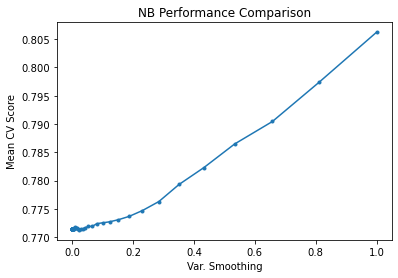

In [30]:
plt.plot(results_NB['var_smoothing'], results_NB['test_score'], marker = '.')    
plt.xlabel('Var. Smoothing')
plt.ylabel("Mean CV Score")
plt.title("NB Performance Comparison")
plt.show()

In [31]:
# predict the target on the test dataset
predict_test = gs_NB.predict(Data_transformed)

# Accuracy Score on test dataset
accuracy_test = accuracy_score(y_test,predict_test)
print('accuracy_score on test dataset : ', accuracy_test*100)

accuracy_score on test dataset :  80.60559177809704


## ML Pipeline

In [32]:
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.ensemble import BaggingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.metrics import explained_variance_score
from sklearn.metrics import mean_absolute_error

In [33]:
num_instances = len(x)

models = []
models.append(('Linear Regression', LinearRegression()))
models.append(('Ridge', Ridge()))
models.append(('Lasso', Lasso()))
models.append(('ElasticNet', ElasticNet()))
models.append(('Bag_Re', BaggingRegressor()))
models.append(('RandomForest', RandomForestRegressor()))
models.append(('ExtraTreesRegressor', ExtraTreesRegressor()))
models.append(('KNN', KNeighborsRegressor()))
models.append(('CART', DecisionTreeRegressor()))
models.append(('SVM', SVR()))

# Evaluations
results = []
names = []
scoring = []

for name, model in models:
    # Fit the model
    model.fit(x,y)
    
    predictions = model.predict(x)
    
    # Evaluate the model
    score = explained_variance_score(y, predictions)
    mae = mean_absolute_error(predictions, y)
    # print("%s: %.2f%%" % (model.metrics_names[1], scores[1]*100))
    results.append(mae)
    names.append(name)
    
    msg = "%s: %f (%f)" % (name, score, mae)
    print(msg)

Linear Regression: 0.227590 (0.312249)
Ridge: 0.227590 (0.312249)
Lasso: 0.038975 (0.365662)
ElasticNet: 0.085340 (0.350988)
Bag_Re: 0.793258 (0.104420)
RandomForest: 0.821454 (0.104212)
ExtraTreesRegressor: 0.891807 (0.040456)
KNN: 0.492571 (0.192208)
CART: 0.891807 (0.040456)
SVM: 0.271643 (0.248587)
